In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import time

In [3]:
file = open('partD/lucrative_scam.txt','r')
content = json.load(file)
df = pd.DataFrame(content, columns = ['Id / Type', 'Value'])
df = df.sort_values(by = ['Value'])
df['Value'] = df['Value'].astype(float) 
df = df.sort_values(by=['Value'], ascending=False)
df

,Id / Type,Value
0,"[5622, Scamming]",1.670908e+22
1,"[2135, Phishing]",6.583972e+21
2,"[90, Phishing]",5.972590e+21
3,"[2258, Phishing]",3.462808e+21
4,"[2137, Phishing]",3.389914e+21
5,"[2132, Scamming]",2.428075e+21
6,"[88, Phishing]",2.067751e+21
7,"[2358, Scamming]",1.835177e+21
8,"[2556, Phishing]",1.803047e+21
9,"[1200, Phishing]",1.630577e+21


In [11]:
time_scams = open('partD/time_scams.txt','r')
content = [[data[0][0], data[0][1], int(data[1])] for data in json.load(time_scams)]
df = pd.DataFrame(content, columns = ['Date', 'Category', 'Value'])
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df = df.sort_values(by='Date')
df.head()

,Date,Category,Value
41,2017-05-01,Phishing,90000000000000000
39,2017-06-01,Scamming,9878410120000000000
24,2017-06-01,Fake ICO,182674023323763277824
12,2017-06-01,Phishing,1000000000000000000
0,2017-07-01,Phishing,10601485555862423470080


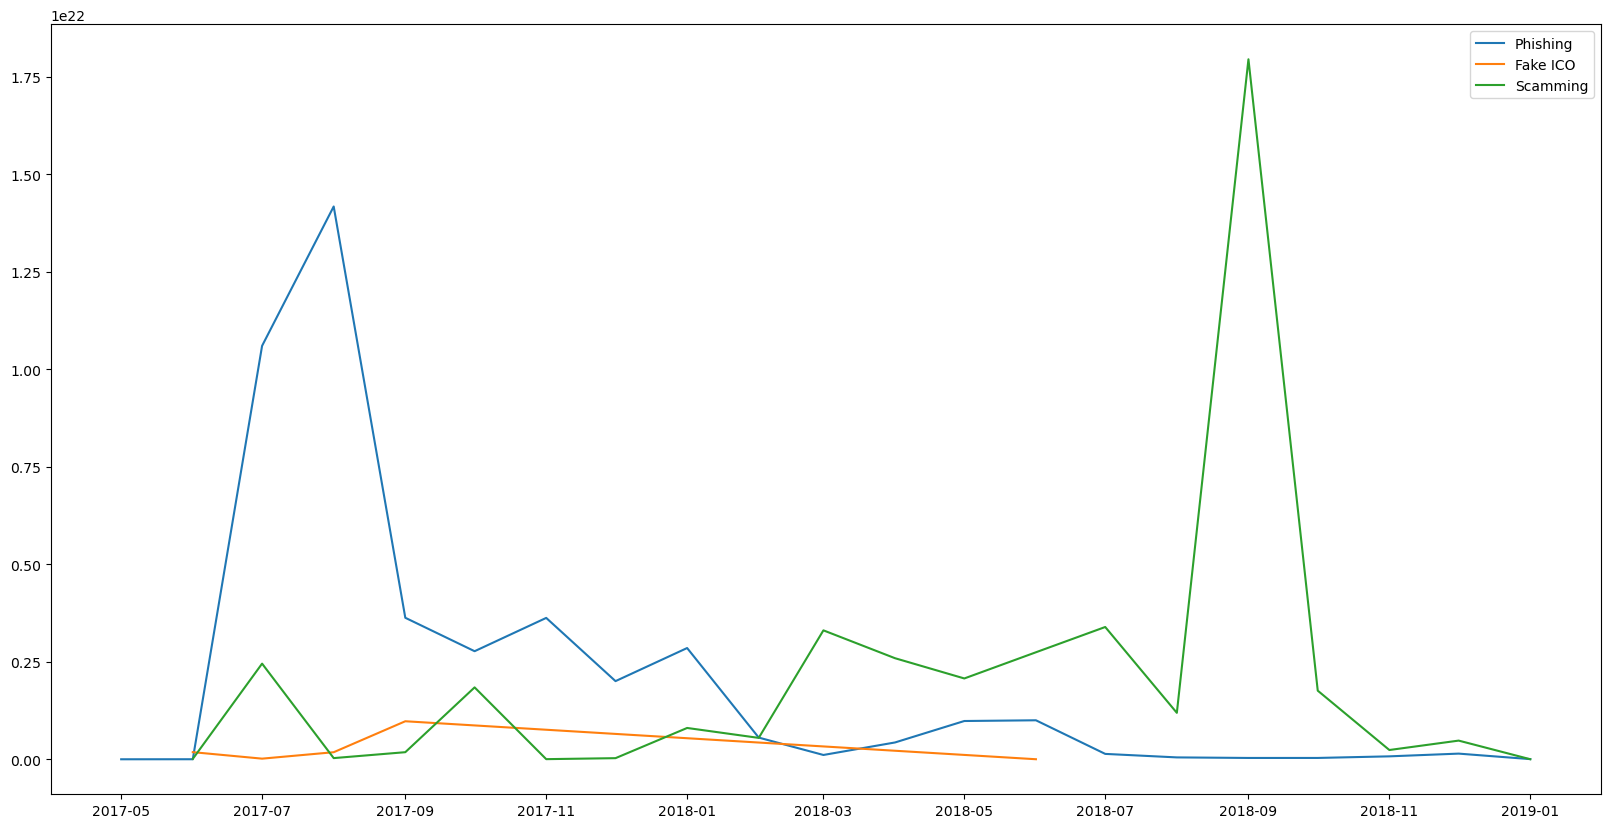

In [12]:
category_set = set(df['Category'])
plt.figure(figsize = (20,10))
for category in category_set:
    selected_data = df.loc[df['Category'] == category]
    
    plt.plot(selected_data['Date'], selected_data['Value'], label=category)
     
plt.legend()
plt.show()

In [21]:
corr_scams = open('partD/corr_scams.txt','r')
content = [[data[0][0], data[0][1], int(data[1])] for data in json.load(corr_scams)]
print(content)
df = pd.DataFrame(content, columns = ['Category', 'Status', 'Counts'])
df

[['Phishing', 'Offline', 9422], ['Phishing', 'Suspended', 11], ['Fake ICO', 'Offline', 121], ['Phishing', 'Inactive', 21], ['Scamming', 'Active', 86943], ['Scamming', 'Offline', 28056], ['Phishing', 'Active', 2965], ['Scamming', 'Suspended', 56]]


,Category,Status,Counts
0,Phishing,Offline,9422
1,Phishing,Suspended,11
2,Fake ICO,Offline,121
3,Phishing,Inactive,21
4,Scamming,Active,86943
5,Scamming,Offline,28056
6,Phishing,Active,2965
7,Scamming,Suspended,56


Status     Active  Inactive  Offline  Suspended
Category                                       
Fake ICO      NaN       NaN    121.0        NaN
Phishing   2965.0      21.0   9422.0       11.0
Scamming  86943.0       NaN  28056.0       56.0


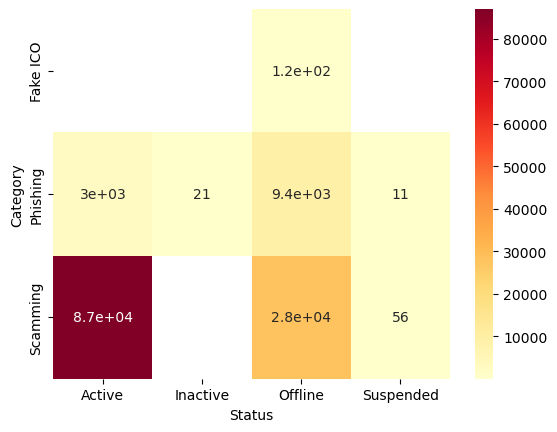

In [33]:
import seaborn as sns
# Convert the data to a pandas dataframe
df = pd.DataFrame(content, columns=['Category', 'Status', 'Counts'])

# Pivot the table to create a matrix for the heatmap
table = pd.pivot_table(df, values='Counts', index='Category', columns='Status')
print(table)
sns.heatmap(table, cmap='YlOrRd', annot=True)
plt.show()